# 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

# 2. Load Data

In [2]:
#import datasets: train, test, weather, spray
#train dataset contains most info on the data collected in Chicago
train = pd.read_csv('../Capstone Project2/train.csv')

In [3]:
test =pd.read_csv('../Capstone Project2/test.csv')

#two data collection spots for weather in weather dataset
weather = pd.read_csv('../Capstone Project2/weather.csv')

#Chicago sprays for mosquitos 
spray=pd.read_csv('../Capstone Project2/spray.csv')

In [54]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

# 3. Data Cleaning

## 3a. Train Dataset

In [4]:
#inspect data and dtypes
print(train.head(n=10))
print(train.dtypes)
print(train.describe())
print(train.info())

         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5  2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6  2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9  2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIEN

In [5]:
#changing date to a datetime object
train['Date']=pd.to_datetime(train['Date'])
print(train.dtypes)
print(train.head())

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object
        Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41

In [6]:
#keeping one address column and dropping the rest
train= train.drop(columns=['Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'])
train.columns

Index(['Date', 'Address', 'Species', 'Trap', 'Latitude', 'Longitude',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

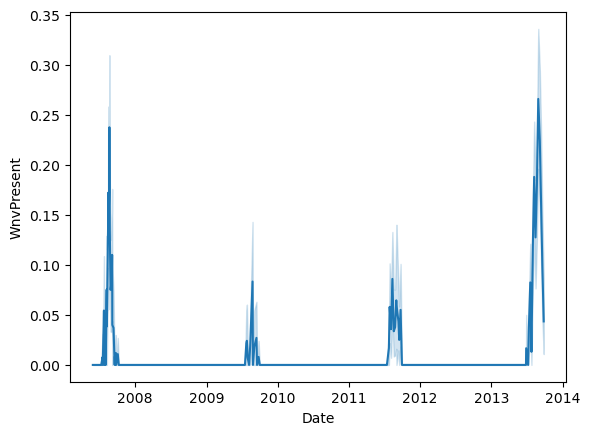

In [7]:
#plot first time vs WnvPresent
sns.lineplot(x='Date', y='WnvPresent', data=train)
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/3353548131.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='NumMosquitos', hue='year', data=train, ax=axes[1], ci=None)


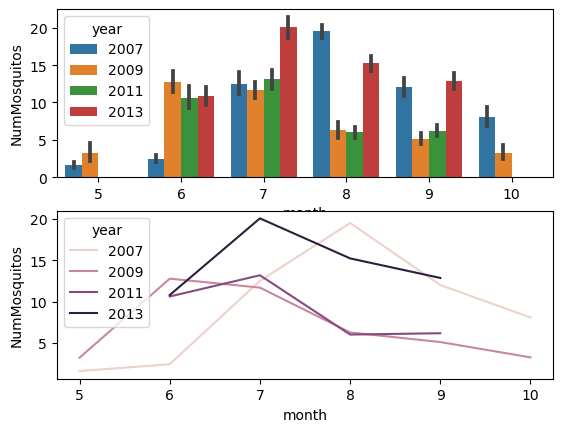

In [8]:
#extract day, month, year from datetime column 'Date'
train['day']= train['Date'].dt.day
train['month']= train['Date'].dt.month
train['year']= train['Date'].dt.year

fig, axes = plt.subplots(2)

#plot month over time with Num of mosquitoes and hue ='year' - need to see the the trend better than plot before
sns.barplot(x='month', y='NumMosquitos', hue='year', data=train, ax=axes[0])

#sns.lineplot(x='month', y='NumMosquitos', hue='year', data=train)
sns.lineplot(x='month', y='NumMosquitos', hue='year', data=train, ax=axes[1], ci=None)

plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/3784050020.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='WnvPresent', hue='year', data=train, ci=None, ax=axes[0])
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/3784050020.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ci=None, ax=axes[1])


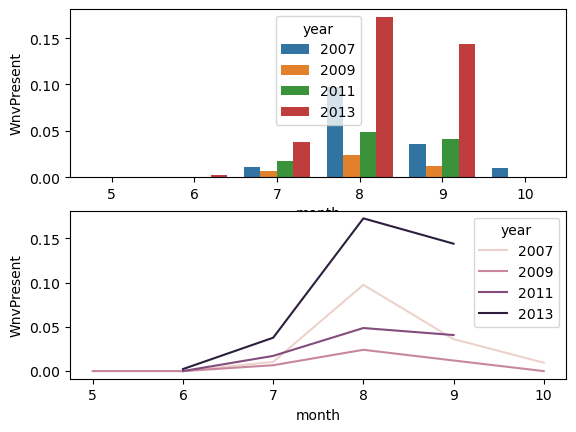

In [9]:
#plot month over time with Wnv Present and hue ='year' 
fig, axes = plt.subplots(2)

sns.barplot(x='month', y='WnvPresent', hue='year', data=train, ci=None, ax=axes[0])

sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ci=None, ax=axes[1])
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/3549375053.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week']=train['Date'].dt.week
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/3549375053.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='WnvPresent', hue='year', data=train, ci=None)


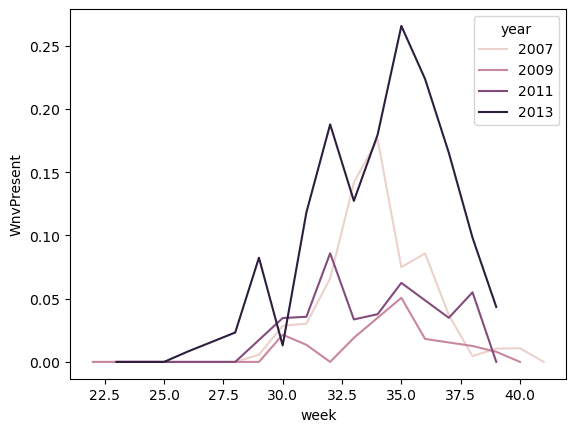

In [10]:
train['week']=train['Date'].dt.week
sns.lineplot(x='week', y='WnvPresent', hue='year', data=train, ci=None)
plt.show()

['CULEX PIPIENS/RESTUANS' 'CULEX RESTUANS' 'CULEX PIPIENS'
 'CULEX SALINARIUS' 'CULEX TERRITANS' 'CULEX TARSALIS' 'CULEX ERRATICUS']
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64


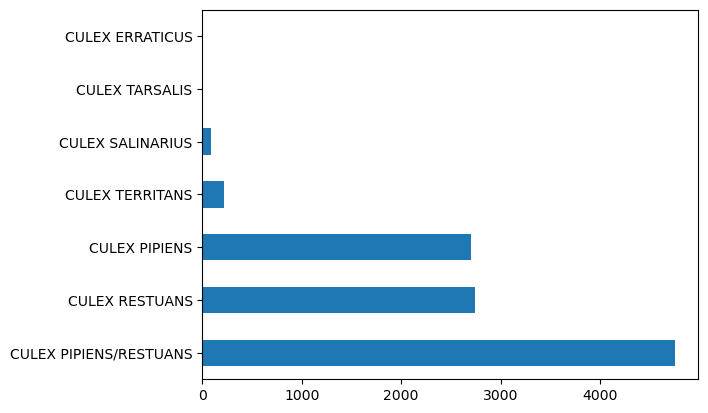

In [11]:
#determine how many of each species of mosquitoes and number of them
print(train.Species.unique())
print(train.Species.value_counts())

train.Species.value_counts().plot(kind='barh')
plt.show()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64


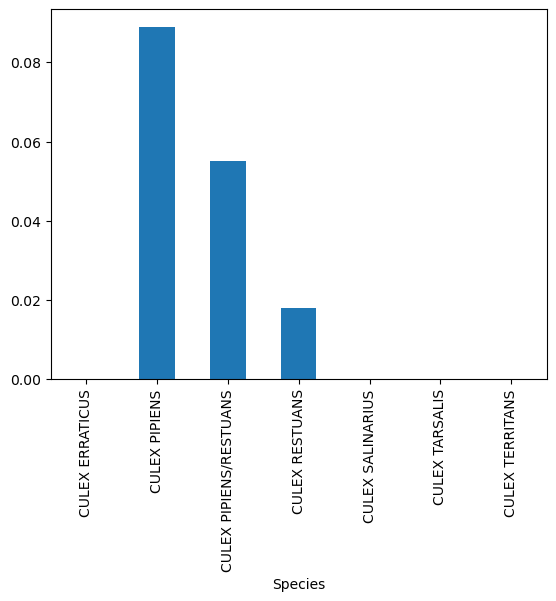

In [12]:
#look into what species seems to carry the virus
print(train.groupby('Species')['WnvPresent'].mean())

train.groupby('Species')['WnvPresent'].mean().plot(kind='bar')
plt.show()


Only three types of mosquitoes carry the West Nile virus. 

Will collapse species into type of mosquitoes that carry the virus and do not carry the virus.

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64
1    10191
0      315
Name: Species_virus, dtype: int64


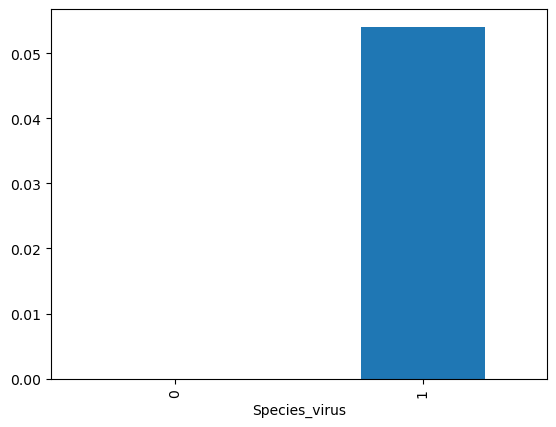

In [13]:
#collapse the species into ones that carry the virus (1) or species that do not carry the virus (0)
mapping= {'CULEX ERRATICUS': 0, 'CULEX PIPIENS': 1, 'CULEX PIPIENS/RESTUANS': 1, 'CULEX RESTUANS': 1, 'CULEX SALINARIUS': 0, 'CULEX TARSALIS': 0, 'CULEX TERRITANS':0}

train['Species_virus'] = train['Species'].map(mapping)

#double check that all got converted into either 1 or 0
print(train.Species.value_counts())
print(train.Species_virus.value_counts())

train.groupby('Species_virus')['WnvPresent'].mean().plot(kind='bar')
plt.show()

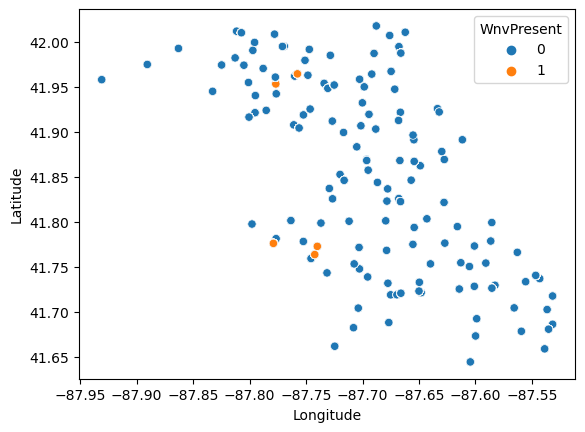

In [14]:
sns.scatterplot(x='Longitude', y='Latitude', data=train, hue='WnvPresent')
plt.show()


In [15]:
train.columns

Index(['Date', 'Address', 'Species', 'Trap', 'Latitude', 'Longitude',
       'NumMosquitos', 'WnvPresent', 'day', 'month', 'year', 'week',
       'Species_virus'],
      dtype='object')

In [16]:
#need to merge data on DATE and STATION SO will create a new column on dfs with station so will assign which station 
#is closest to each trap's latitude and longitude
def adding_station_col(x, y):
    # function to determine which station is closest to each latitude and longtitude point in dataframe
    df_corrdinates = (x, y)
    station_1 = (41.995, -87.933)
    station_2 = (41.786, -87.752)
    
    if geopy.distance.geodesic(station_1, df_corrdinates) < geopy.distance.geodesic(station_2, df_corrdinates) :
        return 1
    else :
        return 2


In [17]:
#add column to train dataset for which trap is closest to station 1 or station 2
train['Station'] = train.apply(lambda df: adding_station_col(df['Latitude'], df['Longitude']), axis=1)

In [18]:
train.columns

Index(['Date', 'Address', 'Species', 'Trap', 'Latitude', 'Longitude',
       'NumMosquitos', 'WnvPresent', 'day', 'month', 'year', 'week',
       'Species_virus', 'Station'],
      dtype='object')

[0 1]
0    9955
1     551
Name: WnvPresent, dtype: int64


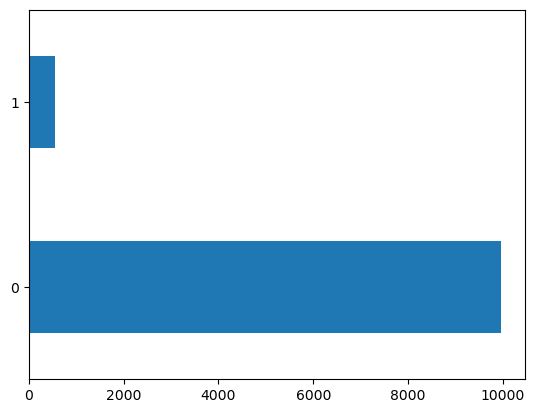

In [19]:
print(train.WnvPresent.unique())
print(train.WnvPresent.value_counts())

train.WnvPresent.value_counts().plot(kind='barh')
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/528146980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/528146980.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)


               Latitude  Longitude  NumMosquitos  WnvPresent       day  \
Latitude       1.000000  -0.701795     -0.184806    0.028697  0.038678   
Longitude     -0.701795   1.000000      0.036633   -0.060345 -0.049094   
NumMosquitos  -0.184806   0.036633      1.000000    0.196820  0.020451   
WnvPresent     0.028697  -0.060345      0.196820    1.000000  0.008245   
day            0.038678  -0.049094      0.020451    0.008245  1.000000   
month         -0.085219   0.097004     -0.026040    0.100143 -0.252047   
year           0.163832  -0.188830     -0.029611    0.050865  0.127248   
week          -0.077001   0.085025     -0.020444    0.104171  0.015033   
Species_virus  0.053927  -0.056593      0.116928    0.041362 -0.002913   
Station       -0.775957   0.711731     -0.005176   -0.059833 -0.049680   

                  month      year      week  Species_virus   Station  
Latitude      -0.085219  0.163832 -0.077001       0.053927 -0.775957  
Longitude      0.097004 -0.188830  0.085025

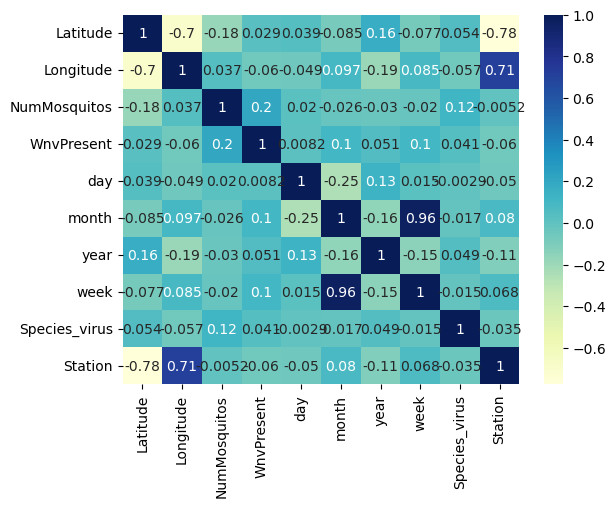

In [20]:
#heatmap to show correlation in the trainset data
print(train.corr())
  
#plot correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
#show heatmap
plt.show()

## 3b. Weather Dataset

In [21]:
#determine how many NAN values, types of categories
print(weather.head())
print(weather.dtypes)
print(weather.describe())
print(weather.info())

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7       

In [22]:
print(weather[100:130])
print(weather[300:320])

     Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
100        1  2007-06-20    84    61   73      3        52      61    0    8   
101        2  2007-06-20    85    62   74      M        50      61    0    9   
102        1  2007-06-21    77    61   69     -1        51      60    0    4   
103        2  2007-06-21    80    66   73      M        51      61    0    8   
104        1  2007-06-22    76    61   69     -1        50      58    0    4   
105        2  2007-06-22    75    62   69      M        49      58    0    4   
106        1  2007-06-23    67    62   65     -5        58      61    0    0   
107        2  2007-06-23    68    61   65      M        60      62    0    0   
108        1  2007-06-24    77    63   70     -1        62      65    0    5   
109        2  2007-06-24    75    65   70      M        62      65    0    5   
110        1  2007-06-25    89    65   77      6        66      70    0   12   
111        2  2007-06-25    86    67   7

In [23]:
#change date column to_datetime object
weather['Date']=pd.to_datetime(weather['Date'])
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

In [24]:
#weather - replace missing info ('M') with NaN
weather.replace('M', np.nan, inplace=True)
weather.isna().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [25]:
#replace T with 0.005 as stands for trace amounts
weather.replace(['  T', ' T', 'T'], 0.005, inplace=True)

weather.isna().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [26]:
#inspect data to make sure removed M and T values
print(weather[100:130])
print(weather[300:320])

     Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
100        1 2007-06-20    84    61   73      3        52      61    0    8   
101        2 2007-06-20    85    62   74    NaN        50      61    0    9   
102        1 2007-06-21    77    61   69     -1        51      60    0    4   
103        2 2007-06-21    80    66   73    NaN        51      61    0    8   
104        1 2007-06-22    76    61   69     -1        50      58    0    4   
105        2 2007-06-22    75    62   69    NaN        49      58    0    4   
106        1 2007-06-23    67    62   65     -5        58      61    0    0   
107        2 2007-06-23    68    61   65    NaN        60      62    0    0   
108        1 2007-06-24    77    63   70     -1        62      65    0    5   
109        2 2007-06-24    75    65   70    NaN        62      65    0    5   
110        1 2007-06-25    89    65   77      6        66      70    0   12   
111        2 2007-06-25    86    67   77    NaN     

In [27]:
#drop columns - Depart, Depth, Water1, SnowFall due to missing information (about half or all missing data on these columns)
weather = weather.drop(columns=['Depart', 'Depth', 'Water1', 'SnowFall'])

In [28]:
#drop columns - Heat, Cool, Sunrise, Sunset as focusing on other features as from literature can read about how temperature, 
#wind potentially can affect West Nile Virus
weather = weather.drop(columns=['Heat', 'Cool'])

In [29]:
weather.replace('-', np.nan, inplace=True)

In [31]:
print(weather.Sunrise.value_counts())
print(weather.isna().sum())

0416    104
0417     64
0419     40
0420     32
0418     32
       ... 
0514      8
0513      8
0512      8
0511      8
0623      8
Name: Sunrise, Length: 121, dtype: int64
Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
DewPoint          0
WetBulb           4
Sunrise        1472
Sunset         1472
CodeSum           0
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64


In [32]:
weather[['Sunrise', 'Sunset']] = weather[['Sunrise', 'Sunset']].fillna(method='ffill')

In [33]:
#determine how many NaN values in each column
print(weather.dtypes)
print(weather.isna().sum())

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
DewPoint                int64
WetBulb                object
Sunrise                object
Sunset                 object
CodeSum                object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object
Station         0
Date            0
Tmax            0
Tmin            0
Tavg           11
DewPoint        0
WetBulb         4
Sunrise         0
Sunset          0
CodeSum         0
PrecipTotal     2
StnPressure     4
SeaLevel        9
ResultSpeed     0
ResultDir       0
AvgSpeed        3
dtype: int64


In [34]:
#Replace the Tavg Nan values with taking the average of (Tmax + Tmin)
weather['Tavg']=weather['Tavg'].fillna(value=((weather['Tmax']+ weather['Tmin'])/2))
print(weather.isna().sum())
weather.head()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        4
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    2
StnPressure    4
SeaLevel       9
ResultSpeed    0
ResultDir      0
AvgSpeed       3
dtype: int64


,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0448,1849,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,0447,1850,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


In [35]:
#replace Wetbulb, PrecipTotal, StnPressure, SeaLevel, AvgSpeed NaN values with ffill - decided this as data shows a lot of consistency between line above to next on other rows
weather[['WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']]= weather[['WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']].fillna(method='ffill')


In [36]:
#changing column type object to numeric - int or float 
weather[['Tavg', 'WetBulb']]=weather[['Tavg', 'WetBulb']].astype('int')
weather[['PrecipTotal', 'StnPressure','SeaLevel', 'AvgSpeed']]= weather[['PrecipTotal', 'StnPressure','SeaLevel', 'AvgSpeed']].astype('float')

weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
DewPoint                int64
WetBulb                 int64
Sunrise                object
Sunset                 object
CodeSum                object
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/2231279448.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ci=None)


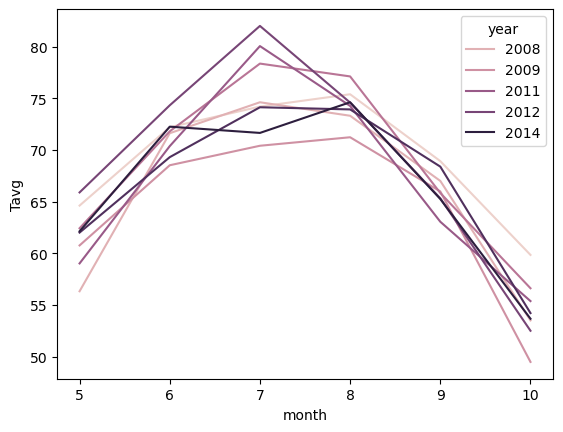

In [37]:
#extracting year, month, day into new columns out of Datetime column
weather['year'] = weather['Date'].dt.year
weather['month'] = weather['Date'].dt.month
weather['day'] = weather['Date'].dt.day

#plot Tavg over time
sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ci=None)
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/2644175993.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ax=ax[0], ci=None)
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70006/2644175993.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ax=ax[1], ci=None)


<Figure size 640x480 with 0 Axes>

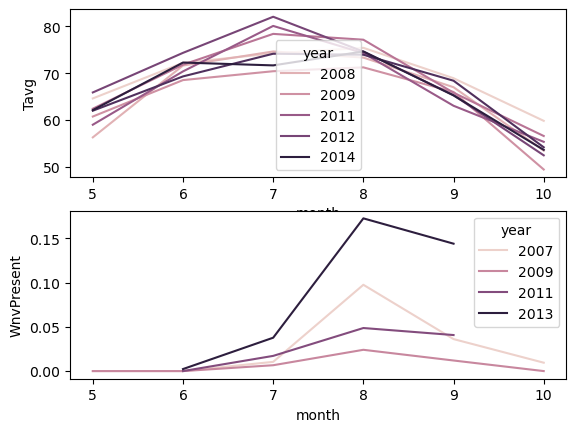

In [38]:
#plot weather and train datasets close together to see avg temp AND WnvPresent look over time
plt.figure()
f, ax = plt.subplots(2)

sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ax=ax[0], ci=None)

sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ax=ax[1], ci=None)
plt.show()



In [39]:
print(weather.CodeSum.value_counts())
print(len(weather.CodeSum))

                    1609
RA                   296
RA BR                238
BR                   110
TSRA RA BR            92
                    ... 
RA DZ SN               1
TS TSRA RA FG BR       1
BR HZ VCFG             1
TS RA FG+ FG BR        1
RA SN BR               1
Name: CodeSum, Length: 98, dtype: int64
2944


In [40]:
print(weather.Station.value_counts())

1    1472
2    1472
Name: Station, dtype: int64


## 3c. Spray Dataset

In [41]:
print(spray.describe())
print(spray.info())
print(len(spray))
print(spray.head())


           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB
None
14835
         Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.

In [42]:
#change Date column to datetime object
spray['Date']=pd.to_datetime(spray['Date'])
spray['year']=spray['Date'].dt.year
spray['month']=spray['Date'].dt.month
spray['day']=spray['Date'].dt.day
spray.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
year                  int64
month                 int64
day                   int64
dtype: object

In [43]:
spray.drop(columns='Time')

,Date,Latitude,Longitude,year,month,day
0,2011-08-29,42.391623,-88.089163,2011,8,29
1,2011-08-29,42.391348,-88.089163,2011,8,29
2,2011-08-29,42.391022,-88.089157,2011,8,29
3,2011-08-29,42.390637,-88.089158,2011,8,29
4,2011-08-29,42.390410,-88.088858,2011,8,29
...,...,...,...,...,...,...
14830,2013-09-05,42.006587,-87.812355,2013,9,5
14831,2013-09-05,42.006192,-87.816015,2013,9,5
14832,2013-09-05,42.006022,-87.817392,2013,9,5
14833,2013-09-05,42.005453,-87.817423,2013,9,5


In [44]:
#determine months they did spray
spray.month.unique()


array([8, 9, 7])

In [45]:
spray.year.unique()

array([2011, 2013])

In [46]:
print(spray[100:200])
print(spray.Date.min())
print(spray.Date.max())

          Date        Time   Latitude  Longitude  year  month  day
100 2011-09-07  7:53:42 PM  41.979352 -87.787753  2011      9    7
101 2011-09-07  7:53:52 PM  41.978850 -87.787763  2011      9    7
102 2011-09-07  7:54:02 PM  41.978398 -87.787773  2011      9    7
103 2011-09-07  7:54:12 PM  41.977990 -87.787760  2011      9    7
104 2011-09-07  7:54:22 PM  41.977495 -87.787778  2011      9    7
..         ...         ...        ...        ...   ...    ...  ...
195 2011-09-07  8:13:42 PM  41.978870 -87.791528  2011      9    7
196 2011-09-07  8:13:52 PM  41.978985 -87.791250  2011      9    7
197 2011-09-07  8:14:02 PM  41.979003 -87.790738  2011      9    7
198 2011-09-07  8:14:12 PM  41.979208 -87.790350  2011      9    7
199 2011-09-07  8:14:22 PM  41.979698 -87.790342  2011      9    7

[100 rows x 7 columns]
2011-08-29 00:00:00
2013-09-05 00:00:00


In [47]:
spray.groupby('year')['month'].value_counts()

year  month
2011  9        2114
      8          95
2013  8        7893
      7        3809
      9         924
Name: month, dtype: int64

Not adding the spray data to BECAUSE
1. Only two years of spray data. 
2. 2011 data is far less than 2013 data. 
3. Most spraying is done in August which is height of West Nile. Would be much more interesting to see if done in July. 

# 4. Merging Datasets 

In [48]:
df = pd.merge(train, weather, how='outer', on=['Date', 'Station'], suffixes=('_train', '_weather'))


In [49]:
df_merged= pd.merge(weather, train, on=['Date', 'Station'], suffixes=('_train', '_weather'))
df_merged.isna().sum()

Station          0
Date             0
Tmax             0
Tmin             0
Tavg             0
DewPoint         0
WetBulb          0
Sunrise          0
Sunset           0
CodeSum          0
PrecipTotal      0
StnPressure      0
SeaLevel         0
ResultSpeed      0
ResultDir        0
AvgSpeed         0
year_train       0
month_train      0
day_train        0
Address          0
Species          0
Trap             0
Latitude         0
Longitude        0
NumMosquitos     0
WnvPresent       0
day_weather      0
month_weather    0
year_weather     0
week             0
Species_virus    0
dtype: int64

In [50]:
#save df to csv file
df_merged.to_csv('train_weather_df.csv')
df_merged.tail()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,...,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,day_weather,month_weather,year_weather,week,Species_virus
10501,2,2013-09-26,75,55,65,52,58,0543,1742,,...,T230,41.904194,-87.756155,13,0,26,9,2013,39,1
10502,2,2013-09-26,75,55,65,52,58,0543,1742,,...,T230,41.904194,-87.756155,5,0,26,9,2013,39,1
10503,2,2013-09-26,75,55,65,52,58,0543,1742,,...,T035,41.763733,-87.742302,6,1,26,9,2013,39,1
10504,2,2013-09-26,75,55,65,52,58,0543,1742,,...,T232,41.912563,-87.668055,1,0,26,9,2013,39,1
10505,2,2013-09-26,75,55,65,52,58,0543,1742,,...,T235,41.776428,-87.627096,1,0,26,9,2013,39,1
